In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import os
from astropy.table import Table
dirname = "/Users/aphearin/Dropbox/UniverseMachine/data/histories/prelim_sfh_reduction"
history_fname = "sfh_catalog_1.002310_smcut_9.50_formatted_histories.hdf5"
histories = Table.read(os.path.join(dirname, history_fname), path='data')

universe_age_array_fname = os.path.join(dirname, "times.npy")
universe_age_array = np.load(universe_age_array_fname)
universe_dt_array = np.diff(np.insert(universe_age_array, 0, 0))

In [3]:
import mass_loss

sfr_histories = histories['sfh']
correct_sm_today = histories['sm'].data
my_sm_today = mass_loss.redshift_zero_stellar_mass(sfr_histories)

fracdiff = np.abs(my_sm_today - correct_sm_today)/correct_sm_today
print(np.max(fracdiff))

0.0876510499407


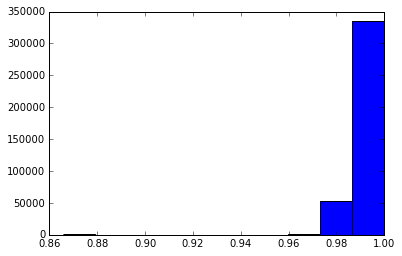

In [4]:
reload(mass_loss)
my_sm_yesterday = mass_loss.stellar_mass_t_now(sfr_histories, 14)

growth_difference = my_sm_yesterday/my_sm_today

__=plt.hist(growth_difference)

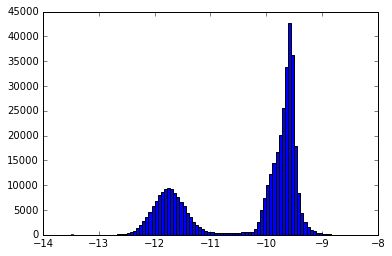

In [27]:
reload(mass_loss)

ssfr = mass_loss.ssfr_t_now(sfr_histories, 10)
mask = np.flatnonzero(ssfr)

__ = plt.hist(np.log10(ssfr[mask]), bins=np.linspace(-13.5, -8, 100))

In [28]:
np.argmax([1, 2, 2, 1, 1, 1, 1, 1])

1

In [30]:
x = np.arange(15).reshape((5, 3`))

In [31]:
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [33]:
x[:, ::-1]

array([[ 2,  1,  0],
       [ 5,  4,  3],
       [ 8,  7,  6],
       [11, 10,  9],
       [14, 13, 12]])